In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 데이터 불러오기

In [60]:
# 상반기 주유소 판매 데이터 불러오기

first = pd.read_csv('../data/2019년 상반기 주유소 판매가격.csv', encoding='cp949')
first

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
90585,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190626,GS칼텍스,셀프,0,1529,1389,0
90586,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190627,GS칼텍스,셀프,0,1529,1389,0
90587,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190628,GS칼텍스,셀프,0,1529,1389,0
90588,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190629,GS칼텍스,셀프,0,1529,1389,0


In [61]:
# 하반기 주유소 판매 데이터 불러오기
second = pd.read_csv('../data/2019년 하반기 주유소 판매가격.csv', encoding='cp949')
second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190704,SK에너지,셀프,1777,1577,1477,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190705,SK에너지,셀프,1777,1577,1477,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [62]:
# 상반기 판매가격 데이터 프레임 결측치 DataFrame조회
first.isnull()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
90585,False,False,False,False,False,False,False,False,False,False,False
90586,False,False,False,False,False,False,False,False,False,False,False
90587,False,False,False,False,False,False,False,False,False,False,False
90588,False,False,False,False,False,False,False,False,False,False,False


In [63]:
# 상반기 판매가격 데이터 프레임 결측치 합 조회
first.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [64]:
# 하반기 판매가격 데이터 프레임 결측치 DataFrame조회
second.isnull()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
91119,False,False,False,False,False,False,False,False,False,False,False
91120,False,False,False,False,False,False,False,False,False,False,False
91121,False,False,False,False,False,False,False,False,False,False,False
91122,False,False,False,False,False,False,False,False,False,False,False


In [65]:
# 하반기 판매가격 데이터 프레임 결측치 합 조회
second.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

# 2. 데이터 결합

In [66]:
# 상반기와 하반기 데이터를 상하로 결합
df = pd.concat([first,second],keys=['상반기','하반기'], ignore_index=True) # ignore_index=True : 인덱스 초기화하고 순서별로
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


# 3. 데이터 가공 및 분석

In [67]:
# 데이터 프레임 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [68]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [69]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [70]:
# 지역 컬럼의 값을 이용하여 시와 구를 분리
name_split = df['지역'].str.split(" ")
df['시'] = name_split.str.get(0)
df['구'] = name_split.str.get(1)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구


In [84]:
type(df)

pandas.core.frame.DataFrame

In [88]:
# 시 컬럼의 서울을 서울특별시로 변환
df.loc[df['시']=='서울','시'] = '서울특별시'
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구


In [90]:
# 기간 컬럼을 datetime 형식으로 변경
df['기간']= pd.to_datetime(df['기간'],format='%Y%m%d')
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-27,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-28,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-29,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-30,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구


In [91]:
# 변경된 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  시       181714 non-null  object        
 12  구       181714 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 18.0+ MB


In [103]:
# 기간 컬럼에서 dt 타입을 이용하여 년, 월, 일, 요일 컬럼 생성
# (참고) https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F 
df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.day_name()
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-27,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,27,Friday
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-28,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,28,Saturday
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-29,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,29,Sunday
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2019-12-30,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,2019,12,30,Monday


In [106]:
# 휘발유 가격이 비싼 5개 판매가격을 출력하세요.
df.sort_values(by=['휘발유'], ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
177210,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,24,Tuesday
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,30,Monday
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,10,1,Tuesday
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,25,Wednesday
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,26,Thursday


In [123]:
# 휘발유 가격이 저렴한 5개 판매가격을 출력하세요. (단 휘발유가 0원인 데이터는 제외)
df.sort_values(by=['휘발유']).loc[df['휘발유']>0].head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,서울특별시,강서구,2019,2,7,Thursday
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,2,1,Friday
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,31,Thursday
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,30,Wednesday
83002,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-30,GS칼텍스,셀프,0,1265,1165,0,서울특별시,은평구,2019,1,30,Wednesday


그래프 10개 
이런 해당 주제에 잘 부합한 그래프로 보여주기

1. 휘발유 가격이 어떻게 분포되어있나? - 지역별, 상표별 - lmplot

5. 셀프 주유소가 일반 주유소보다 싼가?


lmplot

상표별 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유
y축:평균 가격, x축:날짜 그래프 개수: 상표 종류
hue : 셀프여부
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 상표와 낮은 상표
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 상표와 낮은 상표

지역별(구) 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유
y축:평균 가격, x축:날짜 그래프 개수: 지역(구)
hue : 셀프여부
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 지역과 낮은 지역
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 지역와 낮은 지역


In [134]:
import seaborn as sns

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

## 지역별, 상표별 휘발유,경유 가격이 어떻게 분포되어있는가?  

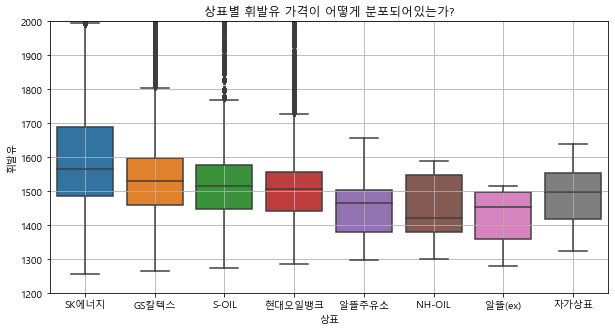

In [167]:
plt.figure(figsize=(10,5))
sns.boxplot(x='상표', y='휘발유', data=df)
# plt.yticks(step=100)
plt.xlabel('상표')
plt.ylabel('휘발유')

plt.title('상표별 휘발유 가격이 어떻게 분포되어있는가?')
plt.grid()

# plt.axis([,,1000, 2000]) # 50,150 : x 영역 | 0, 0.03 : y 영역
plt.ylim([1200 ,2000])
plt.show()

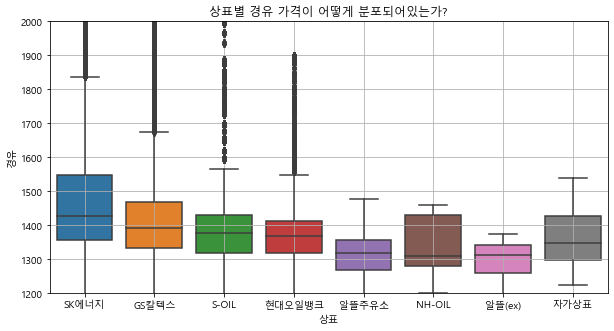

In [168]:
plt.figure(figsize=(10,5))
sns.boxplot(x='상표', y='경유', data=df)

plt.xlabel('상표')
plt.ylabel('경유')

plt.title('상표별 경유 가격이 어떻게 분포되어있는가?')
plt.grid()

plt.ylim([1200 ,2000])
plt.show()

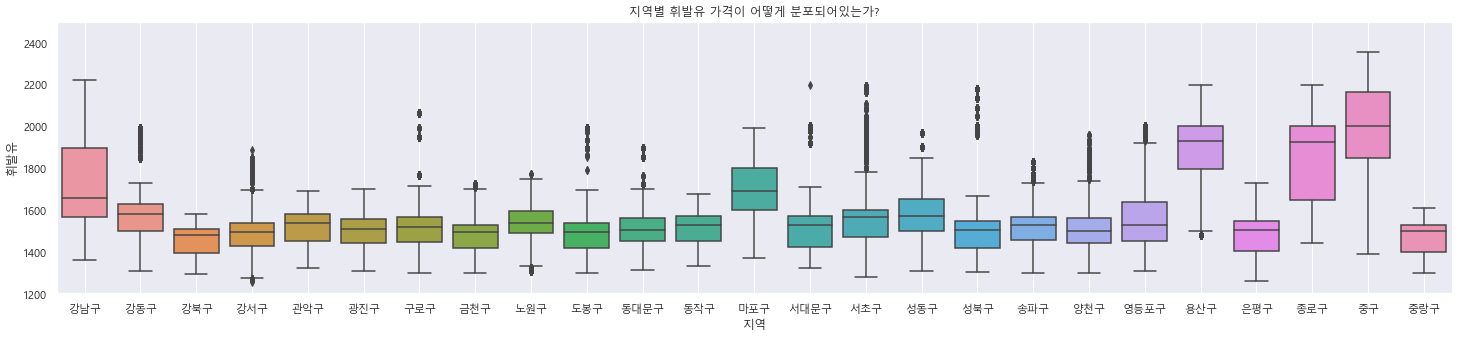

In [403]:
plt.figure(figsize=(25,5))
sns.boxplot(x='구', y='휘발유', data=df)

plt.xlabel('지역')
plt.ylabel('휘발유')

plt.title('지역별 휘발유 가격이 어떻게 분포되어있는가?')
plt.grid()

plt.ylim([1200 ,2500])
plt.show()

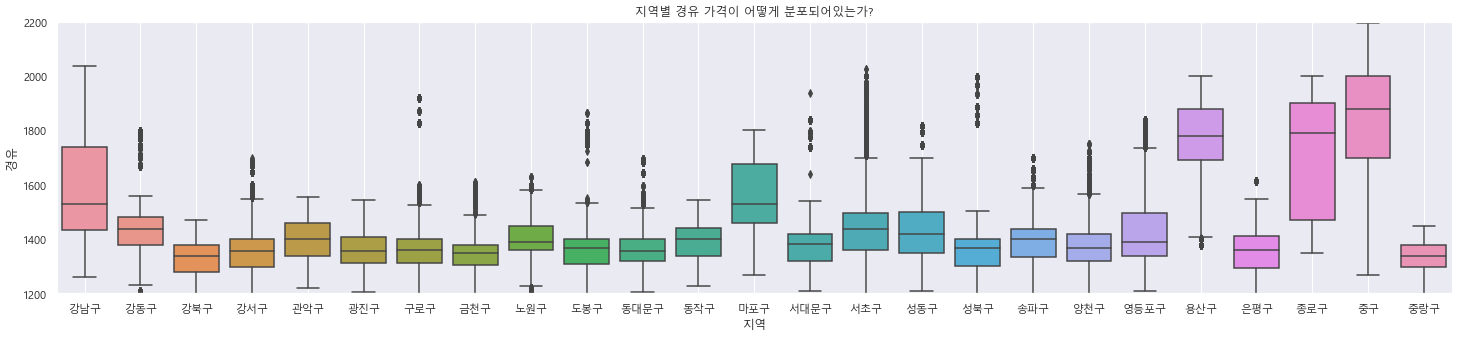

In [402]:
plt.figure(figsize=(25,5))
sns.boxplot(x='구', y='경유', data=df)

plt.xlabel('지역')
plt.ylabel('경유')

plt.title('지역별 경유 가격이 어떻게 분포되어있는가?')
plt.grid()

plt.ylim([1200 ,2200])
plt.show()

In [174]:
df.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday


## 셀프 주유소가 일반 주유소보다 싼가?

In [225]:
df1 = df[['상표','셀프여부','휘발유']]
df1.pivot_table(index='상표', values='휘발유', columns='셀프여부') #   aggfunc='mean'

셀프여부,셀프,일반
상표,,
GS칼텍스,1481.410074,1610.060123
NH-OIL,NaN,1449.088889
S-OIL,1481.437428,1579.451162
SK에너지,1504.853863,1690.377765
알뜰(ex),1431.347945,NaN
알뜰주유소,1434.726027,1455.372511
자가상표,1494.409449,1491.740351
현대오일뱅크,1483.546767,1534.254225


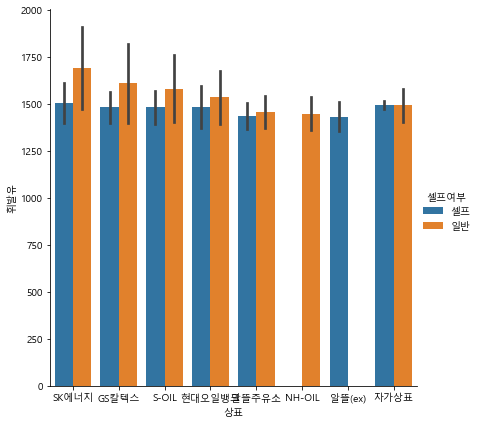

In [228]:
sns.catplot( data=df1, kind="bar",
    x="상표", y="휘발유", hue="셀프여부",ci="sd",height=6)
plt.show()

## 상표별 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유  
y축:평균 가격, x축:날짜 그래프 개수: 상표 종류  
hue : 셀프여부  
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 상표와 낮은 상표  
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 상표와 낮은 상표  

In [349]:
df.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday


In [350]:
# 사용할 데이터
df[['기간','상표','고급휘발유','휘발유','경유']].head()

,기간,상표,고급휘발유,휘발유,경유
0,2019-01-01,SK에너지,1673,1465,1365
1,2019-01-02,SK에너지,1673,1465,1365
2,2019-01-03,SK에너지,1673,1465,1365
3,2019-01-04,SK에너지,1673,1465,1365
4,2019-01-05,SK에너지,1673,1465,1365


In [395]:
d1 = df.pivot_table(values='휘발유', columns=['상표'],index=['기간']) #   aggfunc='mean'
d1 = d1.rolling(7).mean()
d1.head()

상표,GS칼텍스,NH-OIL,S-OIL,SK에너지,알뜰(ex),알뜰주유소,자가상표,현대오일뱅크
기간,,,,,,,,
2019-01-01,1485.786765,1399.0,1453.360000,1540.519802,1299.0,1355.181818,1406.666667,1449.935897
2019-01-02,1481.397059,1399.0,1451.440000,1536.188119,1319.0,1354.000000,1406.666667,1446.320513
2019-01-03,1474.551471,1399.0,1448.360000,1532.103960,1319.0,1349.636364,1403.333333,1442.102564
2019-01-04,1472.073529,1399.0,1444.608108,1530.242574,1319.0,1349.454545,1391.333333,1440.038462
2019-01-05,1469.133333,1399.0,1444.054054,1521.574257,1299.0,1348.818182,1391.333333,1436.756410


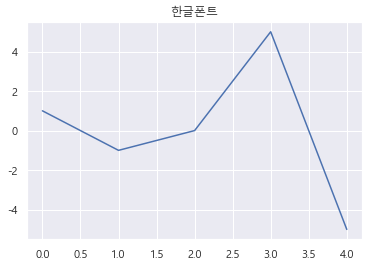

In [431]:
# 한글 깨짐 현상이 있어서 밑의 방식으로 해결
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

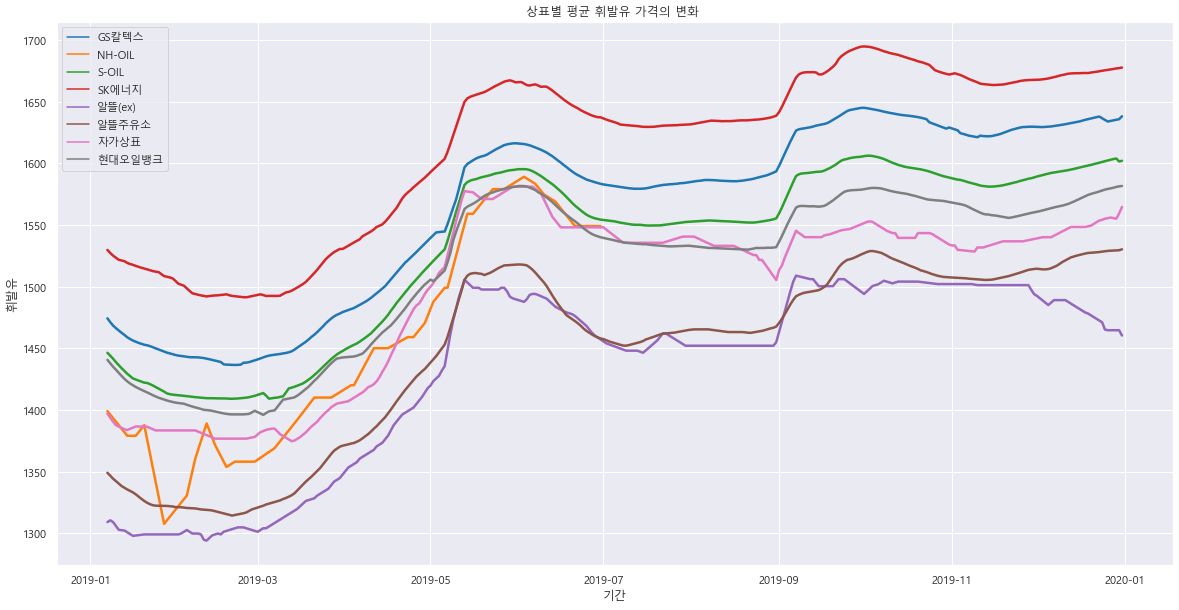

In [432]:
# sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
plt.xlabel('기간')
plt.ylabel('휘발유')

plt.title('상표별 평균 휘발유 가격의 변화 ')
sns.lineplot(data=d1,palette="tab10", linewidth=2.5,dashes=False)

지역별(구) 평균 가격의 변화 - 휘발유, 경유, 고급 휘발유  
y축:평균 가격, x축:날짜 그래프 개수: 지역(구)  
hue : 셀프여부  
-> 결론 : 휘발유, 경유, 고급 휘발유의 평균 가격이 가장 높은 지역과 낮은 지역  
	휘발유, 경유, 고급 휘발유의 가격 변동률이 가장 높은 지역와 낮은 지역  

## 요일별 휘발유 가격

In [417]:
df.head(1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday


In [420]:
days= df[['요일','휘발유']]
days.rename(columns={'요일':'day','휘발유':'gasoline'}, inplace = True)
days

C:\Users\wonseyoung\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,day,gasoline
0,Tuesday,1465
1,Wednesday,1465
2,Thursday,1465
3,Friday,1465
4,Saturday,1465
...,...,...
181709,Friday,1540
181710,Saturday,1540
181711,Sunday,1540
181712,Monday,1540


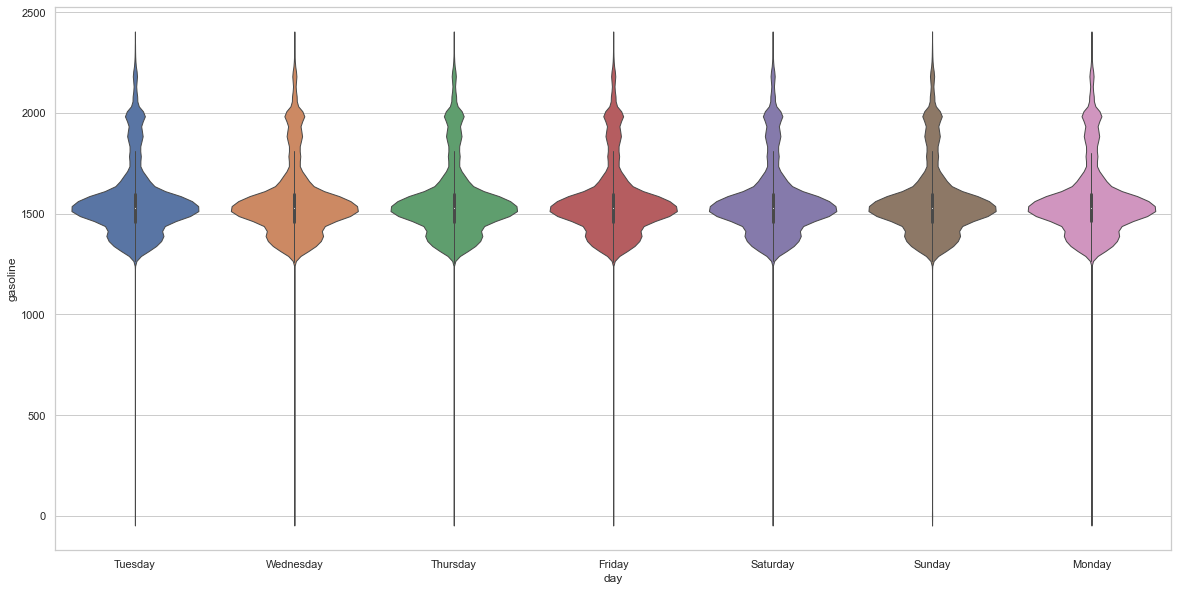

In [435]:
plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")


sns.violinplot(data=days, x="day", y="gasoline", linewidth=1)
plt.show()